In [2]:
# load the data
import sys
sys.path.append("../scripts")
import pandas as pd
import numpy as np
import seaborn as sns
import os
import ot
import ramachandraw
from tqdm import tqdm
from ChangePointDetector import ChangePointDetector
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
data_folder = os.path.join("..", "data")
raw_filename = os.path.join(data_folder, "A_2D_1ps.dat")
shifted_filename = os.path.join(data_folder, "ADP_2D.txt")
names = ['phi', 'psi']
raw_angles = pd.read_csv(raw_filename, names=names, sep=' ')
shifted_angles = pd.read_csv(shifted_filename, names=names, sep=' ')
phi, psi = pd.DataFrame(), pd.DataFrame()
phi['shifted'] = shifted_angles['phi']
phi['raw'] = raw_angles['phi']
psi['shifted'] = shifted_angles['psi']
psi['raw'] = raw_angles['psi']

In [7]:
# shifing utility functions
def dihedral_shift(before, after):
    delta = after - before
    return after - 360*int(round(delta/360))

def deshift(angle):
    return ((angle + 180) % 360) - 180

In [24]:
# clean the data
psi['unshift'] = psi['shifted'].apply(deshift)
phi['unshift'] = phi['shifted'].apply(deshift)
psi['unshift_err'] = abs(1 - psi['raw'] / psi['unshift'])

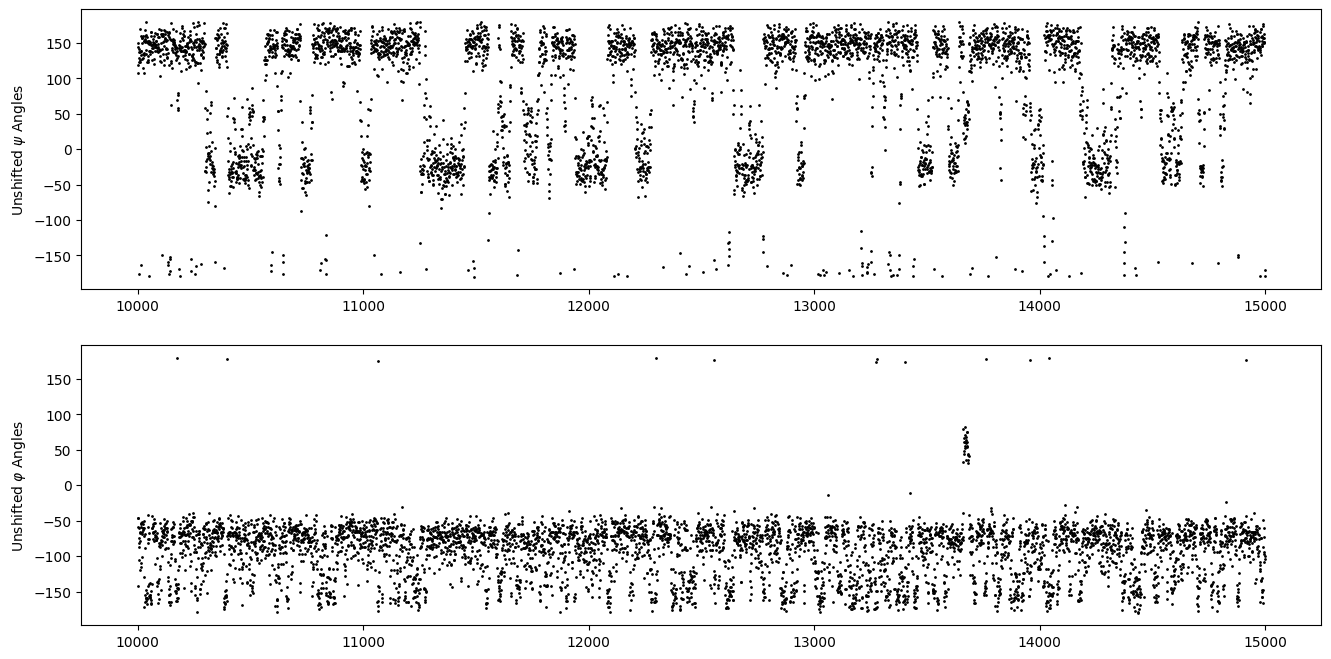

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16,8)
lo = 10000
hi = 15000
ax1.scatter(np.arange(lo, hi), psi['raw'][lo:hi], color='black', s=1)
ax2.scatter(np.arange(lo, hi), phi['raw'][lo:hi], color='black', s=1)
ax1.set_ylabel(r'Unshifted $\psi$ Angles')
ax2.set_ylabel(r'Unshifted $\varphi$ Angles')
plt.savefig("../img/unshifted_angles.pdf", bbox_inches='tight')

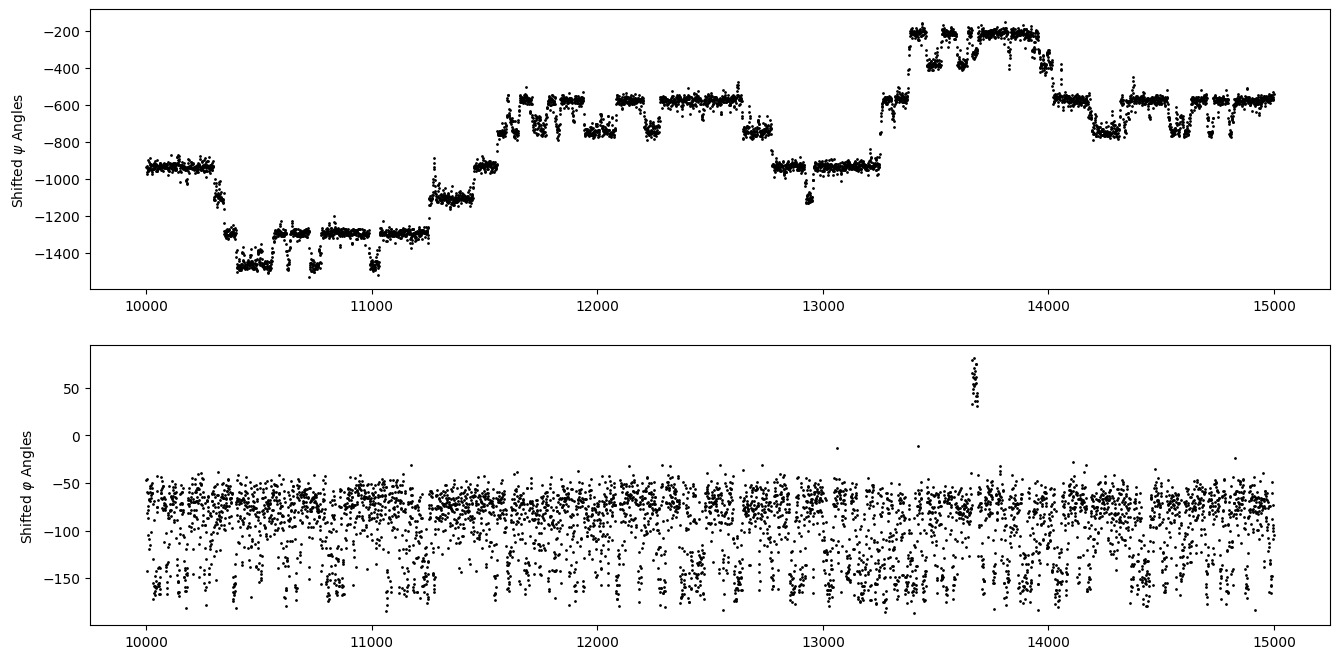

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16,8)
lo = 10000
hi = 15000
ax1.scatter(np.arange(lo, hi), psi['shifted'][lo:hi], color='black', s=1)
ax2.scatter(np.arange(lo, hi), phi['shifted'][lo:hi], color='black', s=1)
ax1.set_ylabel(r'Shifted $\psi$ Angles')
ax2.set_ylabel(r'Shifted $\varphi$ Angles')
plt.savefig("../img/shifted_angles.pdf", bbox_inches='tight')

In [11]:
# detect the componentwise change points
w, q = 50, 0.7
phi_detector = ChangePointDetector()
psi_detector = ChangePointDetector()
phi_detector.set_data(arr=phi['shifted'].to_numpy().reshape((len(phi), 1)))
psi_detector.set_data(arr=psi['shifted'].to_numpy().reshape((len(psi), 1)))
phi_detector.compute_change_points(windowsize=w, cutoff=q)
psi_detector.compute_change_points(windowsize=w, cutoff=q)

KeyboardInterrupt: 

  0% 0/199950 [00:00<?, ?it/s]

  0% 565/199950 [00:00<00:35, 5641.20it/s]

  1% 1148/199950 [00:00<00:34, 5739.33it/s]

  1% 1736/199950 [00:00<00:34, 5799.60it/s]

  1% 2331/199950 [00:00<00:33, 5856.87it/s]

  1% 2917/199950 [00:00<00:34, 5745.51it/s]

  2% 3498/199950 [00:00<00:34, 5764.36it/s]

  2% 4093/199950 [00:00<00:33, 5823.93it/s]

  2% 4683/199950 [00:00<00:33, 5845.25it/s]

  3% 5277/199950 [00:00<00:33, 5873.84it/s]

  3% 5865/199950 [00:01<00:33, 5716.97it/s]

  3% 6452/199950 [00:01<00:33, 5762.24it/s]

  4% 7034/199950 [00:01<00:33, 5777.54it/s]

  4% 7613/199950 [00:01<00:33, 5753.22it/s]

  4% 8197/199950 [00:01<00:33, 5773.63it/s]

  4% 8775/199950 [00:01<00:33, 5741.23it/s]

  5% 9354/199950 [00:01<00:33, 5753.41it/s]

  5% 9940/199950 [00:01<00:32, 5782.92it/s]

  5% 10532/199950 [00:01<00:32, 5818.55it/s]

  6% 11126/199950 [00:01<00:32, 5853.01it/s]

  6% 11712/199950 [00:02<00:34, 5513.77it/s]

  6% 12293/199950 [00:02<00:33, 5598.17it/s]

  6% 12863/199950 [00:02<00:33, 5626.62it/s]

  7% 13433/199950 [00:02<00:33, 5647.87it/s]

  7% 14000/199950 [00:02<00:33, 5601.24it/s]

  7% 14580/199950 [00:02<00:32, 5657.62it/s]

  8% 15161/199950 [00:02<00:32, 5699.84it/s]

  8% 15755/199950 [00:02<00:31, 5769.88it/s]

  8% 16351/199950 [00:02<00:31, 5823.67it/s]

  8% 16934/199950 [00:02<00:31, 5822.38it/s]

  9% 17517/199950 [00:03<00:31, 5723.59it/s]

  9% 18096/199950 [00:03<00:31, 5742.69it/s]

  9% 18671/199950 [00:03<00:31, 5743.77it/s]

 10% 19265/199950 [00:03<00:31, 5801.97it/s]

 10% 19846/199950 [00:03<00:31, 5728.79it/s]

 10% 20433/199950 [00:03<00:31, 5770.35it/s]

 11% 21011/199950 [00:03<00:31, 5770.82it/s]

 11% 21601/199950 [00:03<00:30, 5809.13it/s]

 11% 22194/199950 [00:03<00:30, 5843.93it/s]

 11% 22782/199950 [00:03<00:30, 5852.32it/s]

 12% 23368/199950 [00:04<00:30, 5759.80it/s]

 12% 23946/199950 [00:04<00:30, 5765.25it/s]

 12% 24538/199950 [00:04<00:30, 5809.41it/s]

 13% 25120/199950 [00:04<00:30, 5805.09it/s]

 13% 25701/199950 [00:04<00:30, 5686.26it/s]

 13% 26281/199950 [00:04<00:30, 5718.45it/s]

 13% 26863/199950 [00:04<00:30, 5748.44it/s]

 14% 27456/199950 [00:04<00:29, 5802.06it/s]

 14% 28050/199950 [00:04<00:29, 5842.47it/s]

 14% 28635/199950 [00:04<00:29, 5737.26it/s]

 15% 29210/199950 [00:05<00:30, 5678.80it/s]

 15% 29790/199950 [00:05<00:29, 5714.36it/s]

 15% 30368/199950 [00:05<00:29, 5729.75it/s]

 15% 30960/199950 [00:05<00:29, 5785.81it/s]

 16% 31539/199950 [00:05<00:29, 5697.71it/s]

 16% 32117/199950 [00:05<00:29, 5721.45it/s]

 16% 32690/199950 [00:05<00:29, 5720.21it/s]

 17% 33281/199950 [00:05<00:28, 5775.16it/s]

 17% 33874/199950 [00:05<00:28, 5818.92it/s]

 17% 34457/199950 [00:06<00:29, 5533.59it/s]

 18% 35014/199950 [00:06<00:30, 5426.12it/s]

 18% 35597/199950 [00:06<00:29, 5540.98it/s]

 18% 36186/199950 [00:06<00:29, 5642.07it/s]

 18% 36776/199950 [00:06<00:28, 5717.43it/s]

 19% 37350/199950 [00:06<00:28, 5682.23it/s]

 19% 37925/199950 [00:06<00:28, 5700.04it/s]

 19% 38511/199950 [00:06<00:28, 5745.14it/s]

 20% 39109/199950 [00:06<00:27, 5811.60it/s]

 20% 39703/199950 [00:06<00:27, 5849.60it/s]

 20% 40289/199950 [00:07<00:27, 5727.26it/s]

 20% 40874/199950 [00:07<00:27, 5762.30it/s]

 21% 41451/199950 [00:07<00:27, 5760.57it/s]

 21% 42031/199950 [00:07<00:27, 5770.04it/s]

 21% 42617/199950 [00:07<00:27, 5794.01it/s]

 22% 43197/199950 [00:07<00:27, 5789.99it/s]

 22% 43777/199950 [00:07<00:26, 5786.81it/s]

 22% 44363/199950 [00:07<00:26, 5807.19it/s]

 22% 44951/199950 [00:07<00:26, 5827.72it/s]

 23% 45545/199950 [00:07<00:26, 5860.35it/s]

 23% 46132/199950 [00:08<00:26, 5761.76it/s]

 23% 46725/199950 [00:08<00:26, 5809.00it/s]

 24% 47307/199950 [00:08<00:26, 5802.63it/s]

 24% 47904/199950 [00:08<00:25, 5851.73it/s]

 24% 48490/199950 [00:08<00:26, 5808.44it/s]

 25% 49072/199950 [00:08<00:26, 5741.07it/s]

 25% 49647/199950 [00:08<00:26, 5710.10it/s]

 25% 50224/199950 [00:08<00:26, 5725.23it/s]

 25% 50829/199950 [00:08<00:25, 5820.81it/s]

 26% 51412/199950 [00:08<00:25, 5819.89it/s]

 26% 51995/199950 [00:09<00:25, 5736.81it/s]

 26% 52575/199950 [00:09<00:25, 5754.06it/s]

 27% 53155/199950 [00:09<00:25, 5766.11it/s]

 27% 53739/199950 [00:09<00:25, 5786.40it/s]

 27% 54318/199950 [00:09<00:25, 5689.73it/s]

 27% 54899/199950 [00:09<00:25, 5723.37it/s]

 28% 55481/199950 [00:09<00:25, 5750.29it/s]

 28% 56057/199950 [00:09<00:25, 5751.87it/s]

 28% 56635/199950 [00:09<00:24, 5759.15it/s]

 29% 57223/199950 [00:09<00:24, 5793.73it/s]

 29% 57803/199950 [00:10<00:25, 5682.28it/s]

 29% 58382/199950 [00:10<00:24, 5712.18it/s]

 29% 58962/199950 [00:10<00:24, 5736.15it/s]

 30% 59554/199950 [00:10<00:24, 5788.38it/s]

 30% 60134/199950 [00:10<00:24, 5735.68it/s]

 30% 60708/199950 [00:10<00:24, 5713.52it/s]

 31% 61285/199950 [00:10<00:24, 5727.84it/s]

 31% 61879/199950 [00:10<00:23, 5790.54it/s]

 31% 62475/199950 [00:10<00:23, 5839.48it/s]

 32% 63067/199950 [00:10<00:23, 5861.17it/s]

 32% 63654/199950 [00:11<00:23, 5731.35it/s]

 32% 64237/199950 [00:11<00:23, 5757.34it/s]

 32% 64814/199950 [00:11<00:23, 5734.92it/s]

 33% 65409/199950 [00:11<00:23, 5794.74it/s]

 33% 65989/199950 [00:11<00:23, 5676.20it/s]

 33% 66580/199950 [00:11<00:23, 5742.78it/s]

 34% 67156/199950 [00:11<00:23, 5747.42it/s]

 34% 67732/199950 [00:11<00:23, 5745.84it/s]

 34% 68326/199950 [00:11<00:22, 5801.66it/s]

 34% 68907/199950 [00:11<00:22, 5794.87it/s]

 35% 69487/199950 [00:12<00:22, 5717.97it/s]

 35% 70067/199950 [00:12<00:22, 5741.31it/s]

 35% 70651/199950 [00:12<00:22, 5765.79it/s]

 36% 71248/199950 [00:12<00:22, 5825.20it/s]

 36% 71831/199950 [00:12<00:22, 5705.70it/s]

 36% 72412/199950 [00:12<00:22, 5735.92it/s]

 37% 72991/199950 [00:12<00:22, 5750.76it/s]

 37% 73581/199950 [00:12<00:21, 5792.76it/s]

 37% 74170/199950 [00:12<00:21, 5820.03it/s]

 37% 74753/199950 [00:13<00:22, 5661.26it/s]

 38% 75329/199950 [00:13<00:21, 5689.01it/s]

 38% 75911/199950 [00:13<00:21, 5727.65it/s]

 38% 76489/199950 [00:13<00:21, 5741.01it/s]

 39% 77090/199950 [00:13<00:21, 5818.80it/s]

 39% 77673/199950 [00:13<00:22, 5427.63it/s]

 39% 78241/199950 [00:13<00:22, 5497.92it/s]

 39% 78822/199950 [00:13<00:21, 5586.11it/s]

 40% 79411/199950 [00:13<00:21, 5672.89it/s]

 40% 80006/199950 [00:13<00:20, 5752.13it/s]

 40% 80584/199950 [00:14<00:20, 5690.65it/s]

 41% 81173/199950 [00:14<00:20, 5747.71it/s]

 41% 81759/199950 [00:14<00:20, 5779.83it/s]

 41% 82344/199950 [00:14<00:20, 5799.43it/s]

 41% 82925/199950 [00:14<00:20, 5755.48it/s]

 42% 83509/199950 [00:14<00:20, 5780.38it/s]

 42% 84088/199950 [00:14<00:20, 5771.17it/s]

 42% 84685/199950 [00:14<00:19, 5829.38it/s]

 43% 85269/199950 [00:14<00:19, 5829.39it/s]

 43% 85857/199950 [00:14<00:19, 5841.30it/s]

 43% 86442/199950 [00:15<00:19, 5743.13it/s]

 44% 87030/199950 [00:15<00:19, 5783.44it/s]

 44% 87617/199950 [00:15<00:19, 5806.44it/s]

 44% 88198/199950 [00:15<00:19, 5803.15it/s]

 44% 88779/199950 [00:15<00:19, 5682.85it/s]

 45% 89360/199950 [00:15<00:19, 5720.09it/s]

 45% 89941/199950 [00:15<00:19, 5744.36it/s]

 45% 90532/199950 [00:15<00:18, 5793.07it/s]

 46% 91136/199950 [00:15<00:18, 5865.18it/s]

 46% 91723/199950 [00:15<00:18, 5805.08it/s]

 46% 92304/199950 [00:16<00:18, 5704.00it/s]

 46% 92875/199950 [00:16<00:19, 5465.34it/s]

 47% 93457/199950 [00:16<00:19, 5564.64it/s]

 47% 94041/199950 [00:16<00:18, 5642.91it/s]

 47% 94607/199950 [00:16<00:18, 5595.84it/s]

 48% 95185/199950 [00:16<00:18, 5648.74it/s]

 48% 95767/199950 [00:16<00:18, 5698.16it/s]

 48% 96357/199950 [00:16<00:17, 5756.96it/s]

 48% 96945/199950 [00:16<00:17, 5790.75it/s]

 49% 97525/199950 [00:16<00:18, 5672.94it/s]

 49% 98097/199950 [00:17<00:17, 5684.27it/s]

 49% 98677/199950 [00:17<00:17, 5718.38it/s]

 50% 99261/199950 [00:17<00:17, 5751.85it/s]

 50% 99852/199950 [00:17<00:17, 5797.94it/s]

 50% 100433/199950 [00:17<00:17, 5678.04it/s]

 51% 101006/199950 [00:17<00:17, 5691.69it/s]

 51% 101587/199950 [00:17<00:17, 5724.39it/s]

 51% 102166/199950 [00:17<00:17, 5741.52it/s]

 51% 102757/199950 [00:17<00:16, 5791.43it/s]

 52% 103337/199950 [00:17<00:17, 5674.72it/s]

 52% 103918/199950 [00:18<00:16, 5713.23it/s]

 52% 104503/199950 [00:18<00:16, 5752.91it/s]

 53% 105081/199950 [00:18<00:16, 5758.33it/s]

 53% 105668/199950 [00:18<00:16, 5789.63it/s]

 53% 106248/199950 [00:18<00:16, 5707.46it/s]

 53% 106822/199950 [00:18<00:16, 5714.65it/s]

 54% 107406/199950 [00:18<00:16, 5749.34it/s]

 54% 107998/199950 [00:18<00:15, 5798.90it/s]

 54% 108603/199950 [00:18<00:15, 5872.20it/s]

 55% 109191/199950 [00:19<00:15, 5748.08it/s]

 55% 109779/199950 [00:19<00:15, 5786.10it/s]

 55% 110359/199950 [00:19<00:15, 5782.50it/s]

 55% 110945/199950 [00:19<00:15, 5802.92it/s]

 56% 111534/199950 [00:19<00:15, 5824.02it/s]

 56% 112117/199950 [00:19<00:15, 5783.57it/s]

 56% 112696/199950 [00:19<00:15, 5755.47it/s]

 57% 113283/199950 [00:19<00:14, 5784.28it/s]

 57% 113872/199950 [00:19<00:14, 5813.37it/s]

 57% 114455/199950 [00:19<00:14, 5818.07it/s]

 58% 115037/199950 [00:20<00:14, 5711.68it/s]

 58% 115609/199950 [00:20<00:14, 5713.52it/s]

 58% 116189/199950 [00:20<00:14, 5738.27it/s]

 58% 116764/199950 [00:20<00:14, 5737.11it/s]

 59% 117338/199950 [00:20<00:14, 5707.96it/s]

 59% 117915/199950 [00:20<00:14, 5723.41it/s]

 59% 118494/199950 [00:20<00:14, 5742.67it/s]

 60% 119075/199950 [00:20<00:14, 5761.63it/s]

 60% 119667/199950 [00:20<00:13, 5808.42it/s]

 60% 120251/199950 [00:20<00:13, 5816.71it/s]

 60% 120833/199950 [00:21<00:13, 5712.75it/s]

 61% 121418/199950 [00:21<00:13, 5751.35it/s]

 61% 122008/199950 [00:21<00:13, 5793.49it/s]

 61% 122590/199950 [00:21<00:13, 5800.76it/s]

 62% 123171/199950 [00:21<00:13, 5735.44it/s]

 62% 123756/199950 [00:21<00:13, 5766.77it/s]

 62% 124335/199950 [00:21<00:13, 5772.97it/s]

 62% 124915/199950 [00:21<00:12, 5778.84it/s]

 63% 125503/199950 [00:21<00:12, 5807.49it/s]

 63% 126089/199950 [00:21<00:12, 5822.31it/s]

 63% 126672/199950 [00:22<00:12, 5684.25it/s]

 64% 127255/199950 [00:22<00:12, 5725.16it/s]

 64% 127834/199950 [00:22<00:12, 5743.87it/s]

 64% 128424/199950 [00:22<00:12, 5789.55it/s]

 65% 129004/199950 [00:22<00:12, 5698.05it/s]

 65% 129597/199950 [00:22<00:12, 5764.49it/s]

 65% 130174/199950 [00:22<00:12, 5755.59it/s]

 65% 130759/199950 [00:22<00:11, 5781.68it/s]

 66% 131355/199950 [00:22<00:11, 5833.11it/s]

 66% 131942/199950 [00:22<00:11, 5844.03it/s]

 66% 132527/199950 [00:23<00:11, 5749.14it/s]

 67% 133109/199950 [00:23<00:11, 5767.57it/s]

 67% 133687/199950 [00:23<00:11, 5672.03it/s]

 67% 134267/199950 [00:23<00:11, 5707.28it/s]

 67% 134839/199950 [00:23<00:11, 5589.44it/s]

 68% 135399/199950 [00:23<00:11, 5578.58it/s]

 68% 135973/199950 [00:23<00:11, 5625.83it/s]

 68% 136554/199950 [00:23<00:11, 5678.53it/s]

 69% 137142/199950 [00:23<00:10, 5735.88it/s]

 69% 137716/199950 [00:23<00:11, 5609.68it/s]

 69% 138278/199950 [00:24<00:11, 5509.19it/s]

 69% 138832/199950 [00:24<00:11, 5516.75it/s]

 70% 139385/199950 [00:24<00:11, 5304.16it/s]

 70% 139918/199950 [00:24<00:11, 5270.47it/s]

 70% 140447/199950 [00:24<00:11, 5006.31it/s]

 71% 140992/199950 [00:24<00:11, 5130.72it/s]

 71% 141508/199950 [00:24<00:11, 5103.50it/s]

 71% 142027/199950 [00:24<00:11, 5128.15it/s]

 71% 142542/199950 [00:24<00:12, 4745.65it/s]

 72% 143023/199950 [00:25<00:12, 4407.92it/s]

 72% 143486/199950 [00:25<00:12, 4467.01it/s]

 72% 144037/199950 [00:25<00:11, 4755.68it/s]

 72% 144601/199950 [00:25<00:11, 5005.93it/s]

 73% 145108/199950 [00:25<00:10, 5021.22it/s]

 73% 145674/199950 [00:25<00:10, 5206.82it/s]

 73% 146220/199950 [00:25<00:10, 5279.36it/s]

 73% 146751/199950 [00:25<00:10, 4915.89it/s]

 74% 147325/199950 [00:25<00:10, 5146.30it/s]

 74% 147857/199950 [00:26<00:10, 5194.44it/s]

 74% 148441/199950 [00:26<00:09, 5377.33it/s]

 75% 148983/199950 [00:26<00:10, 5040.29it/s]

 75% 149534/199950 [00:26<00:09, 5171.76it/s]

 75% 150070/199950 [00:26<00:09, 5221.44it/s]

 75% 150622/199950 [00:26<00:09, 5306.89it/s]

 76% 151176/199950 [00:26<00:09, 5372.87it/s]

 76% 151745/199950 [00:26<00:08, 5465.09it/s]

 76% 152309/199950 [00:26<00:08, 5516.63it/s]

 76% 152862/199950 [00:26<00:08, 5496.98it/s]

 77% 153413/199950 [00:27<00:08, 5492.09it/s]

 77% 153982/199950 [00:27<00:08, 5547.31it/s]

 77% 154538/199950 [00:27<00:08, 5424.31it/s]

 78% 155082/199950 [00:27<00:08, 5394.06it/s]

 78% 155623/199950 [00:27<00:08, 5377.95it/s]

 78% 156201/199950 [00:27<00:07, 5494.54it/s]

 78% 156764/199950 [00:27<00:07, 5534.26it/s]

 79% 157337/199950 [00:27<00:07, 5592.36it/s]

 79% 157920/199950 [00:27<00:07, 5660.68it/s]

 79% 158496/199950 [00:27<00:07, 5688.13it/s]

 80% 159065/199950 [00:28<00:07, 5539.64it/s]

 80% 159653/199950 [00:28<00:07, 5637.97it/s]

 80% 160218/199950 [00:28<00:07, 5632.37it/s]

 80% 160807/199950 [00:28<00:06, 5707.85it/s]

 81% 161379/199950 [00:28<00:06, 5644.46it/s]

 81% 161951/199950 [00:28<00:06, 5665.55it/s]

 81% 162519/199950 [00:28<00:06, 5668.44it/s]

 82% 163103/199950 [00:28<00:06, 5717.13it/s]

 82% 163704/199950 [00:28<00:06, 5802.16it/s]

 82% 164285/199950 [00:28<00:06, 5746.16it/s]

 82% 164860/199950 [00:29<00:06, 5662.55it/s]

 83% 165438/199950 [00:29<00:06, 5694.41it/s]

 83% 166008/199950 [00:29<00:05, 5683.10it/s]

 83% 166583/199950 [00:29<00:05, 5701.47it/s]

 84% 167154/199950 [00:29<00:05, 5641.77it/s]

 84% 167725/199950 [00:29<00:05, 5660.97it/s]

 84% 168305/199950 [00:29<00:05, 5701.39it/s]

 84% 168893/199950 [00:29<00:05, 5752.85it/s]

 85% 169487/199950 [00:29<00:05, 5807.71it/s]

 85% 170068/199950 [00:29<00:05, 5752.72it/s]

 85% 170644/199950 [00:30<00:05, 5636.21it/s]

 86% 171209/199950 [00:30<00:05, 5593.14it/s]

 86% 171781/199950 [00:30<00:05, 5627.92it/s]

 86% 172367/199950 [00:30<00:04, 5695.27it/s]

 86% 172937/199950 [00:30<00:04, 5659.29it/s]

 87% 173515/199950 [00:30<00:04, 5694.25it/s]

 87% 174086/199950 [00:30<00:04, 5698.83it/s]

 87% 174667/199950 [00:30<00:04, 5730.19it/s]

 88% 175273/199950 [00:30<00:04, 5827.70it/s]

 88% 175856/199950 [00:30<00:04, 5714.31it/s]

 88% 176447/199950 [00:31<00:04, 5771.72it/s]

 89% 177027/199950 [00:31<00:03, 5778.15it/s]

 89% 177606/199950 [00:31<00:03, 5749.54it/s]

 89% 178195/199950 [00:31<00:03, 5786.73it/s]

 89% 178774/199950 [00:31<00:03, 5700.90it/s]

 90% 179348/199950 [00:31<00:03, 5708.99it/s]

 90% 179935/199950 [00:31<00:03, 5755.15it/s]

 90% 180529/199950 [00:31<00:03, 5808.45it/s]

 91% 181126/199950 [00:31<00:03, 5853.98it/s]

 91% 181712/199950 [00:32<00:03, 5723.44it/s]

 91% 182286/199950 [00:32<00:03, 5721.63it/s]

 91% 182859/199950 [00:32<00:02, 5716.82it/s]

 92% 183445/199950 [00:32<00:02, 5757.48it/s]

 92% 184031/199950 [00:32<00:02, 5782.04it/s]

 92% 184610/199950 [00:32<00:02, 5773.59it/s]

 93% 185195/199950 [00:32<00:02, 5794.08it/s]

 93% 185775/199950 [00:32<00:02, 5794.57it/s]

 93% 186361/199950 [00:32<00:02, 5812.05it/s]

 94% 186960/199950 [00:32<00:02, 5864.60it/s]

 94% 187547/199950 [00:33<00:02, 5731.95it/s]

 94% 188132/199950 [00:33<00:02, 5764.20it/s]

 94% 188720/199950 [00:33<00:01, 5794.62it/s]

 95% 189303/199950 [00:33<00:01, 5803.10it/s]

 95% 189885/199950 [00:33<00:01, 5798.75it/s]

 95% 190466/199950 [00:33<00:01, 5472.36it/s]

 96% 191018/199950 [00:33<00:01, 5436.35it/s]

 96% 191576/199950 [00:33<00:01, 5476.88it/s]

 96% 192127/199950 [00:33<00:01, 5486.10it/s]

 96% 192693/199950 [00:33<00:01, 5536.54it/s]

 97% 193248/199950 [00:34<00:01, 5353.00it/s]

 97% 193816/199950 [00:34<00:01, 5446.70it/s]

 97% 194365/199950 [00:34<00:01, 5458.96it/s]

 97% 194934/199950 [00:34<00:00, 5526.84it/s]

 98% 195488/199950 [00:34<00:00, 5373.56it/s]

 98% 196027/199950 [00:34<00:00, 5305.46it/s]

 98% 196575/199950 [00:34<00:00, 5355.63it/s]

 99% 197112/199950 [00:34<00:00, 5353.26it/s]

 99% 197684/199950 [00:34<00:00, 5460.14it/s]

 99% 198231/199950 [00:34<00:00, 5452.60it/s]

 99% 198787/199950 [00:35<00:00, 5484.17it/s]

100% 199359/199950 [00:35<00:00, 5554.26it/s]

100% 199927/199950 [00:35<00:00, 5591.31it/s]

100% 199950/199950 [00:35<00:00, 5667.15it/s]

<Axes: >

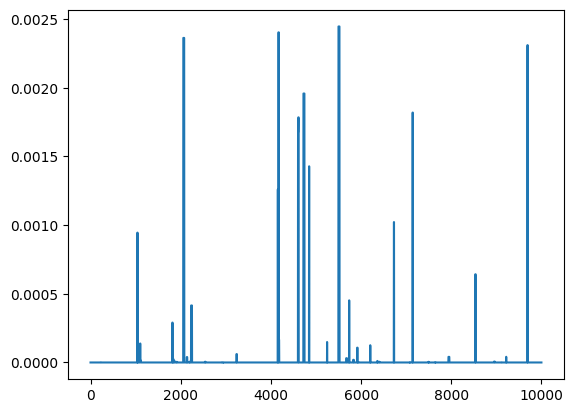

In [ ]:
entropic_dists = []
epsilon = 0.01
w = 25
N = len(shifted_angles)
for t in tqdm(range(w, N - w)):
    mu_lo, mu_hi = t - w, t
    nu_lo, nu_hi = t + 1, t + w
    mu = shifted_angles[mu_lo:mu_hi].to_numpy()
    nu = shifted_angles[nu_lo:nu_hi].to_numpy()
    entropic_dists.append(ot.bregman.empirical_sinkhorn2(mu, nu, epsilon) ** 0.5)


In [ ]:
# filter for and output the final change points
def argmax_filter_change_points(differences, boundaries):
    filtered_points = []
    for i in range(len(boundaries) - 1):
        lo = boundaries[i]
        hi = boundaries[i + 1]
        if hi - lo > 1:
            subset = differences[lo:hi]
        if type(subset) is not np.ndarray:
            subset = np.array(subset)
        filtered_points.append(subset.argmax() + lo)
    return filtered_points

def slope_filter_change_points(data, boundaries):
    filtered_points = []
    for i in tqdm(range(len(boundaries) - 1)):
        lo = boundaries[i]
        hi = boundaries[i+1]
        subset = data[lo:hi]
        slopes = np.zeros((hi - lo, hi - lo))
        for i in range(hi - lo):
            for j in range(hi - lo):
                slopes[i,j] = subset[i] - subset[j]
        filtered_points.append((slopes.argmax() % (hi - lo))+ lo)
    return filtered_points


In [21]:
# detect the "change regions"
q = 0.95
cutoff = np.quantile(entropic_dists, q)
entropic_cps = []
for index, dist in enumerate(entropic_dists):
    if dist > cutoff:
        entropic_cps.append(index + w)
entropic_boundaries = detect_change_region_boundaries(entropic_cps)
len(entropic_boundaries)

1590

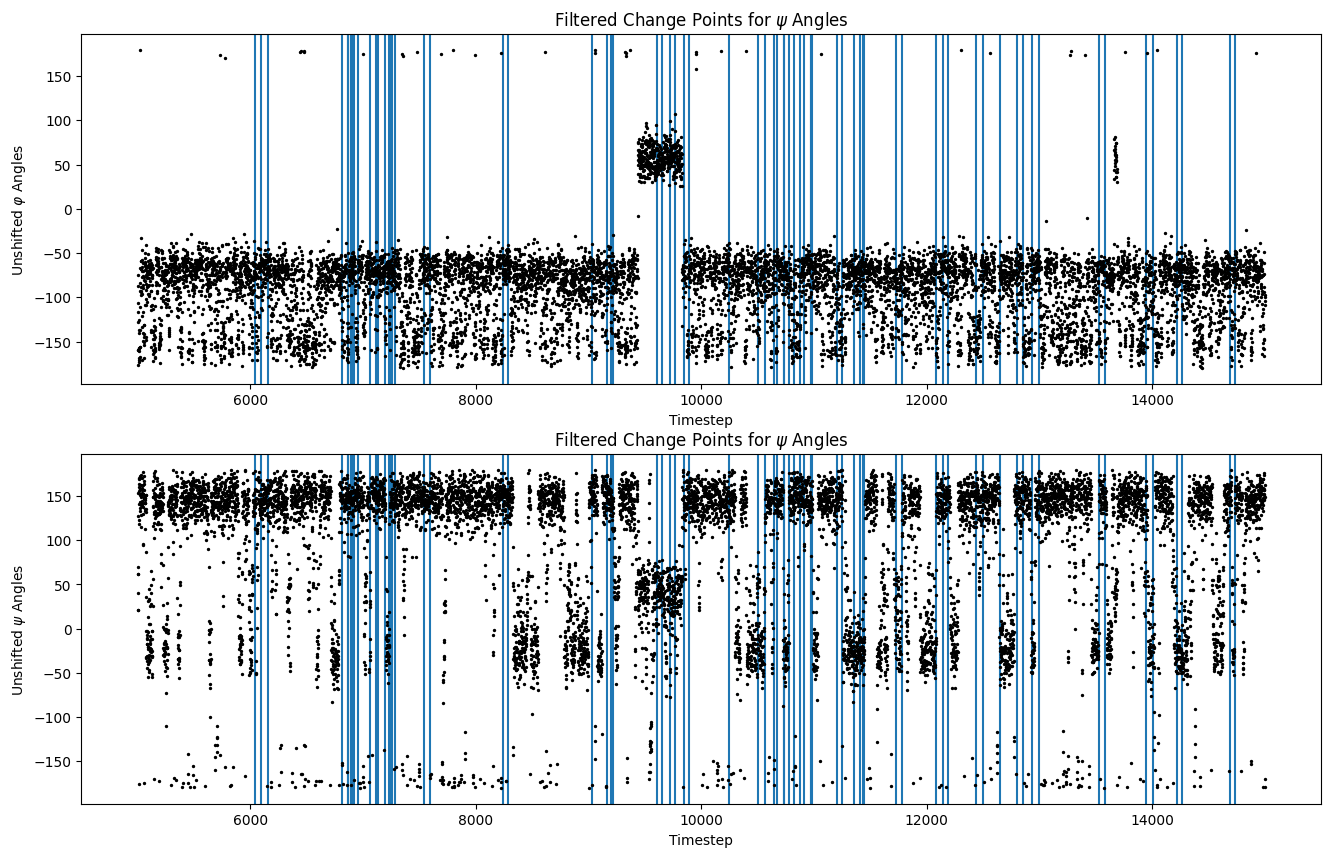

In [25]:
lo, hi = 5000, 15000
filtered_entropic_cps = argmax_filter_change_points(entropic_dists, entropic_boundaries)
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16,10)

ax1.scatter(np.arange(lo, hi), phi['unshift'][lo:hi], color='black', s=2)
ax1.set_ylabel(r"Unshifted $\varphi$ Angles")
ax1.set_xlabel("Timestep")
ax1.set_title(r"Filtered Change Points for $\psi$ Angles")
for cp in filtered_entropic_cps:
    if cp > lo and cp < hi:
        ax1.axvline(cp, zorder=0)
ax2.scatter(np.arange(lo, hi), psi['unshift'][lo:hi], color='black', s=2)
ax2.set_ylabel(r"Unshifted $\psi$ Angles")
ax2.set_xlabel("Timestep")
ax2.set_title(r"Filtered Change Points for $\psi$ Angles")
for cp in filtered_entropic_cps:
    if cp > lo and cp < hi:
        ax2.axvline(cp, zorder=0)

plt.savefig("../img/psi_cps.pdf", bbox_inches='tight')

In [16]:
filtered_psi_cps = argmax_filter_change_points(psi_diffs, psi_boundary_pts)
filtered_phi_cps = argmax_filter_change_points(phi_diffs, phi_boundary_pts)

NameError: name 'psi_diffs' is not defined

NameError: name 'psi_cps' is not defined

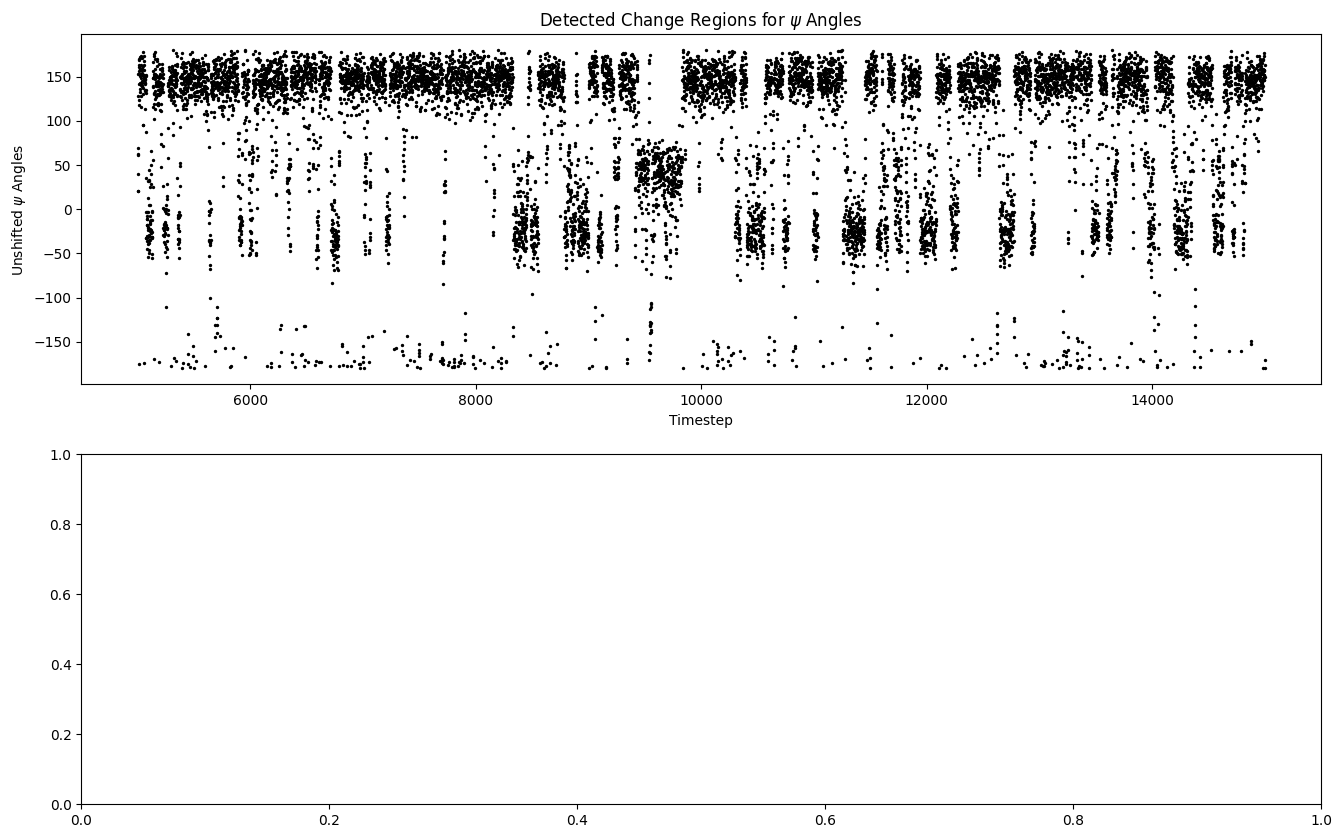

NameError: name 'psi_cps' is not defined

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(16,10)
ax1.scatter(np.arange(lo, hi), psi['unshift'][lo:hi], color='black', s=2)
ax1.set_ylabel(r"Unshifted $\psi$ Angles")
ax1.set_xlabel("Timestep")
ax1.set_title(r"Detected Change Regions for $\psi$ Angles")
for cp in psi_cps:
    if cp > lo and cp < hi:
        ax1.axvline(cp, zorder=0, color='red')
for cp in psi_boundary_pts:
    if cp > lo and cp < hi:
        ax1.axvline(cp, zorder=0, color='blue')

ax2.scatter(np.arange(lo, hi), psi['unshift'][lo:hi], color='black', s=2)
ax2.set_ylabel(r"Unshifted $\psi$ Angles")
ax2.set_xlabel("Timestep")
ax2.set_title(r"Filtered Change Points for $\psi$ Angles")
for cp in filtered_psi_cps:
    if cp > lo and cp < hi:
        ax2.axvline(cp, zorder=0)

plt.savefig("../img/psi_cps.pdf", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
nx.draw(graph, positions, ax=ax, with_labels=True)

In [63]:
# group the final distributions


In [ ]:
# spectral cluster on the final distributions to get labels?

In [ ]:
# compute means and variances of distributions

In [ ]:
# maybe plot the stats and try to divine a pattern?